In [111]:
import numpy as np
import json
import matplotlib.pyplot as plt

class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)
    
LAYER_2_WEST = [f'L2_{i:02d}' for i in [15,16,17,18,19,0,1,2,3,4]]
LAYER_2_EAST = [f'L2_{i:02d}' for i in [14,13,12,11,10,9,8,7,6,5]]

LAYER_1_WEST = [f'L1_{i:02d}' for i in [12,13,14,15,0,1,2,3]]
LAYER_1_EAST = [f'L1_{i:02d}' for i in [11,10,9,8,7,6,5,4]]

LAYER_0_WEST = [f'L0_{i:02d}' for i in [9,10,11,0,1,2]]
LAYER_0_EAST = [f'L0_{i:02d}' for i in [8,7,6,5,4,3]]


def plot_layer(data,addresses,title,filename):
    fig = plt.figure(figsize=(20,2*len(addresses)), dpi=100)
    ax = fig.add_subplot(111)
    ax.set_ylim(0,512*len(addresses))
    ax.set_xlim(0,1024*9)
    ax.set_ylabel('Row')
    ax.set_xlabel('Column')

    for i in range(9):
        ax.axvline(x=1024*i, color='black', linestyle='--')
        
    for i in range(len(addresses)):
        ax.axhline(y=512*i, color='black', linestyle='--')

    iaddress = 0
    for address in addresses:
        if address not in data:
            continue
        dead_pixels = data[address]
        dead_pixels = np.array(dead_pixels)
        percentages = []
        for i in range(9):
            chip = dead_pixels[dead_pixels[:,0]==i]
            percentages.append(100*(len(chip)/(1024*512)))
            ax.text(1024*i+50, 450+512*iaddress, r'$N_{\mathrm{dead}}$ = ' + f'{len(chip)} ({percentages[i]:.3f}%)', fontsize=11, color='black')
            if percentages[i] < 0.01:
                # change background color of the chip to gold
                ax.add_patch(plt.Rectangle((1024*i,512*iaddress),1024,512,fill=True,facecolor='gold',edgecolor='black'))
            elif percentages[i] < 0.1:
                # change background color of the chip to silver
                ax.add_patch(plt.Rectangle((1024*i,512*iaddress),1024,512,fill=True,facecolor='silver',edgecolor='black'))
            else :
                # change color to bronze
                ax.add_patch(plt.Rectangle((1024*i,512*iaddress),1024,512,fill=True,facecolor='peru',edgecolor='black'))


        rows = [dead_pixels[i,1] + 512*iaddress for i in range(len(dead_pixels))]
        cols = [dead_pixels[i,2] + 1024*dead_pixels[i,0] for i in range(len(dead_pixels))]
        ax.scatter(cols,rows,marker='s',c='r',s=3)
        iaddress += 1
    
    # change y axis labels to addresses
    ax.set_yticks([512*i+256 for i in range(len(addresses))])
    ax.set_yticklabels(addresses)
    
    fig.suptitle(title, fontsize=16, fontweight='bold', y=0.92)
    plt.savefig(filename)
    plt.show()


def plot_layer_compare(data_deadmap, data_deadmap2, addresses, title, filename):

    fig = plt.figure(figsize=(20,2*len(addresses)), dpi=100)
    ax = fig.add_subplot(111)
    ax.set_ylim(0,512*len(addresses))
    ax.set_xlim(0,1024*9)

    ax.set_ylabel('Row')
    ax.set_xlabel('Column')

    for i in range(9):
        ax.axvline(x=1024*i, color='black', linestyle='--')
        
    for i in range(len(addresses)):
        ax.axhline(y=512*i, color='black', linestyle='--')

    iaddress = 0
    for address in addresses:
        
        if address not in data_deadmap:
            continue
        if address not in data_deadmap2:
            continue

        dead_pixels = data_deadmap[address]
        dead_pixels = np.array(dead_pixels)

        dead_pixels2 = data_deadmap2[address]
        dead_pixels2 = np.array(dead_pixels2)

        percentages = []
        percentages2 = []
        for i in range(9):
            chip = dead_pixels[dead_pixels[:,0]==i]
            chip2 = dead_pixels2[dead_pixels2[:,0]==i]
            percentages.append(100*(len(chip)/(1024*512)))
            percentages2.append(100*(len(chip2)/(1024*512)))
            ax.text(1024*i+50, 450+512*iaddress, r'$N_{\mathrm{dead}}$ = ' + f'{len(chip)} ({percentages[i]:.3f}%)', fontsize=11, color='black')
            # ax.text(1024*i+50, 450+512*iaddress-50, r'$N_{\mathrm{dead}}$ = ' + f'{len(chip2)} ({percentages2[i]:.3f}%)', fontsize=11, color='black')
            if percentages[i] < 0.01:
                # change background color of the chip to gold
                ax.add_patch(plt.Rectangle((1024*i,512*iaddress),1024,512,fill=True,facecolor='gold',edgecolor='black'))
            elif percentages[i] < 0.1:
                # change background color of the chip to silver
                ax.add_patch(plt.Rectangle((1024*i,512*iaddress),1024,512,fill=True,facecolor='silver',edgecolor='black'))
            else :
                # change color to bronze
                ax.add_patch(plt.Rectangle((1024*i,512*iaddress),1024,512,fill=True,facecolor='peru',edgecolor='black'))
            
            # if percentages2[i] < 0.01:
            #     # change background color of the chip to gold
            #     ax.add_patch(plt.Rectangle((1024*i,512*iaddress-50),1024,512,fill=True,facecolor='gold',edgecolor='black'))
            # elif percentages2[i] < 0.1:
            #     # change background color of the chip to silver
            #     ax.add_patch(plt.Rectangle((1024*i,512*iaddress-50),1024,512,fill=True,facecolor='silver',edgecolor='black'))
            # else :
            #     # change color to bronze
            #     ax.add_patch(plt.Rectangle((1024*i,512*iaddress-50),1024,512,fill=True,facecolor='peru',edgecolor='black'))


        


        rows = [dead_pixels[i,1] + 512*iaddress for i in range(len(dead_pixels))]
        cols = [dead_pixels[i,2] + 1024*dead_pixels[i,0] for i in range(len(dead_pixels))]
 


        rows2 = [dead_pixels2[i,1] + 512*iaddress for i in range(len(dead_pixels2))]
        cols2 = [dead_pixels2[i,2] + 1024*dead_pixels2[i,0] for i in range(len(dead_pixels2))]
    

        shared_rows = []
        shared_cols = []
        for i in range(len(rows)):
           for j in range(len(rows2)):
               if rows[i] == rows2[j] and cols[i] == cols2[j]:
                   shared_rows.append(rows[i])
                   shared_cols.append(cols[i])
            
        
        
        ax.scatter(cols,rows,marker='s',c='r',s=3, label='Deadmap only 20240320')
        ax.scatter(cols2,rows2,marker='s',c='b',s=3, label='Deadmap only 20240316')
        ax.scatter(shared_cols,shared_rows,marker='s',c='k',s=3, label='Pixel appears in both deadmaps')
        
        iaddress += 1
    
    # change y axis labels to addresses
    ax.set_yticks([512*i+256 for i in range(len(addresses))])
    ax.set_yticklabels(addresses)
    
    import matplotlib.patches as mpatches
    red_patch = mpatches.Patch(color='red', label='Appears only 20240320')
    blue_patch = mpatches.Patch(color='blue', label='Appears only 20240316')
    black_patch = mpatches.Patch(color='black', label='Pixel appears in both deadmaps')
    plt.legend(handles=[red_patch, blue_patch, black_patch], loc='lower left')
    
    fig.suptitle(title, fontsize=16, fontweight='bold', y=0.92)
    plt.savefig(filename)
    plt.show()


def plot_stave(data,stave_address):
    fig = plt.figure(figsize=(20,3), dpi=300)
    ax = fig.add_subplot(111)
    ax.set_ylim(0,512)
    ax.set_xlim(0,1024*9)
    ax.set_ylabel('Row')
    ax.set_xlabel('Column')

    
    for i in range(9):
        ax.axvline(x=1024*i, color='black', linestyle='--')
    if stave_address not in data:
        return
    dead_pixels = data[stave_address]
    dead_pixels = np.array(dead_pixels)

    percentages = []
    for i in range(9):
        chip = dead_pixels[dead_pixels[:,0]==i]
        percentages.append(100*(len(chip)/(1024*512)))
        ax.text(1024*i+560, 400, f'{percentages[i]:.3f}%', fontsize=10, color='black')
    rows = [dead_pixels[i,1] for i in range(len(dead_pixels))]
    cols = [dead_pixels[i,2] + 1024*dead_pixels[i,0] for i in range(len(dead_pixels))]
    # ax.scatter(dead_pixels[:,1],dead_pixels[:,0],marker='s',c='r')
    ax.scatter(cols,rows,marker='s',c='r',s=3)

    fig.suptitle(f'{stave_address} - {dead_pixels.shape[0]} dead pixels', fontsize=16, fontweight='bold', y=0.96)

    plt.show()
    

In [112]:
deadpix_map_20240320='/home/tmengel/mvtx-decoder/deadpix/deadmaps/deadpix_map_20240320.json'
deadpix_map_20240316='/home/tmengel/mvtx-decoder/deadpix/deadmaps/deadpix_map_20240316.json'
masked_pixels='/home/tmengel/mvtx-decoder/deadpix/deadmaps/masked_pixels.json'
with open(deadpix_map_20240316) as f:
    data_deadmap_20240316 = json.load(f)
with open(masked_pixels) as f:
    data_masked = json.load(f)
with open(deadpix_map_20240320) as f:
    data_deadmap_20240320 = json.load(f)


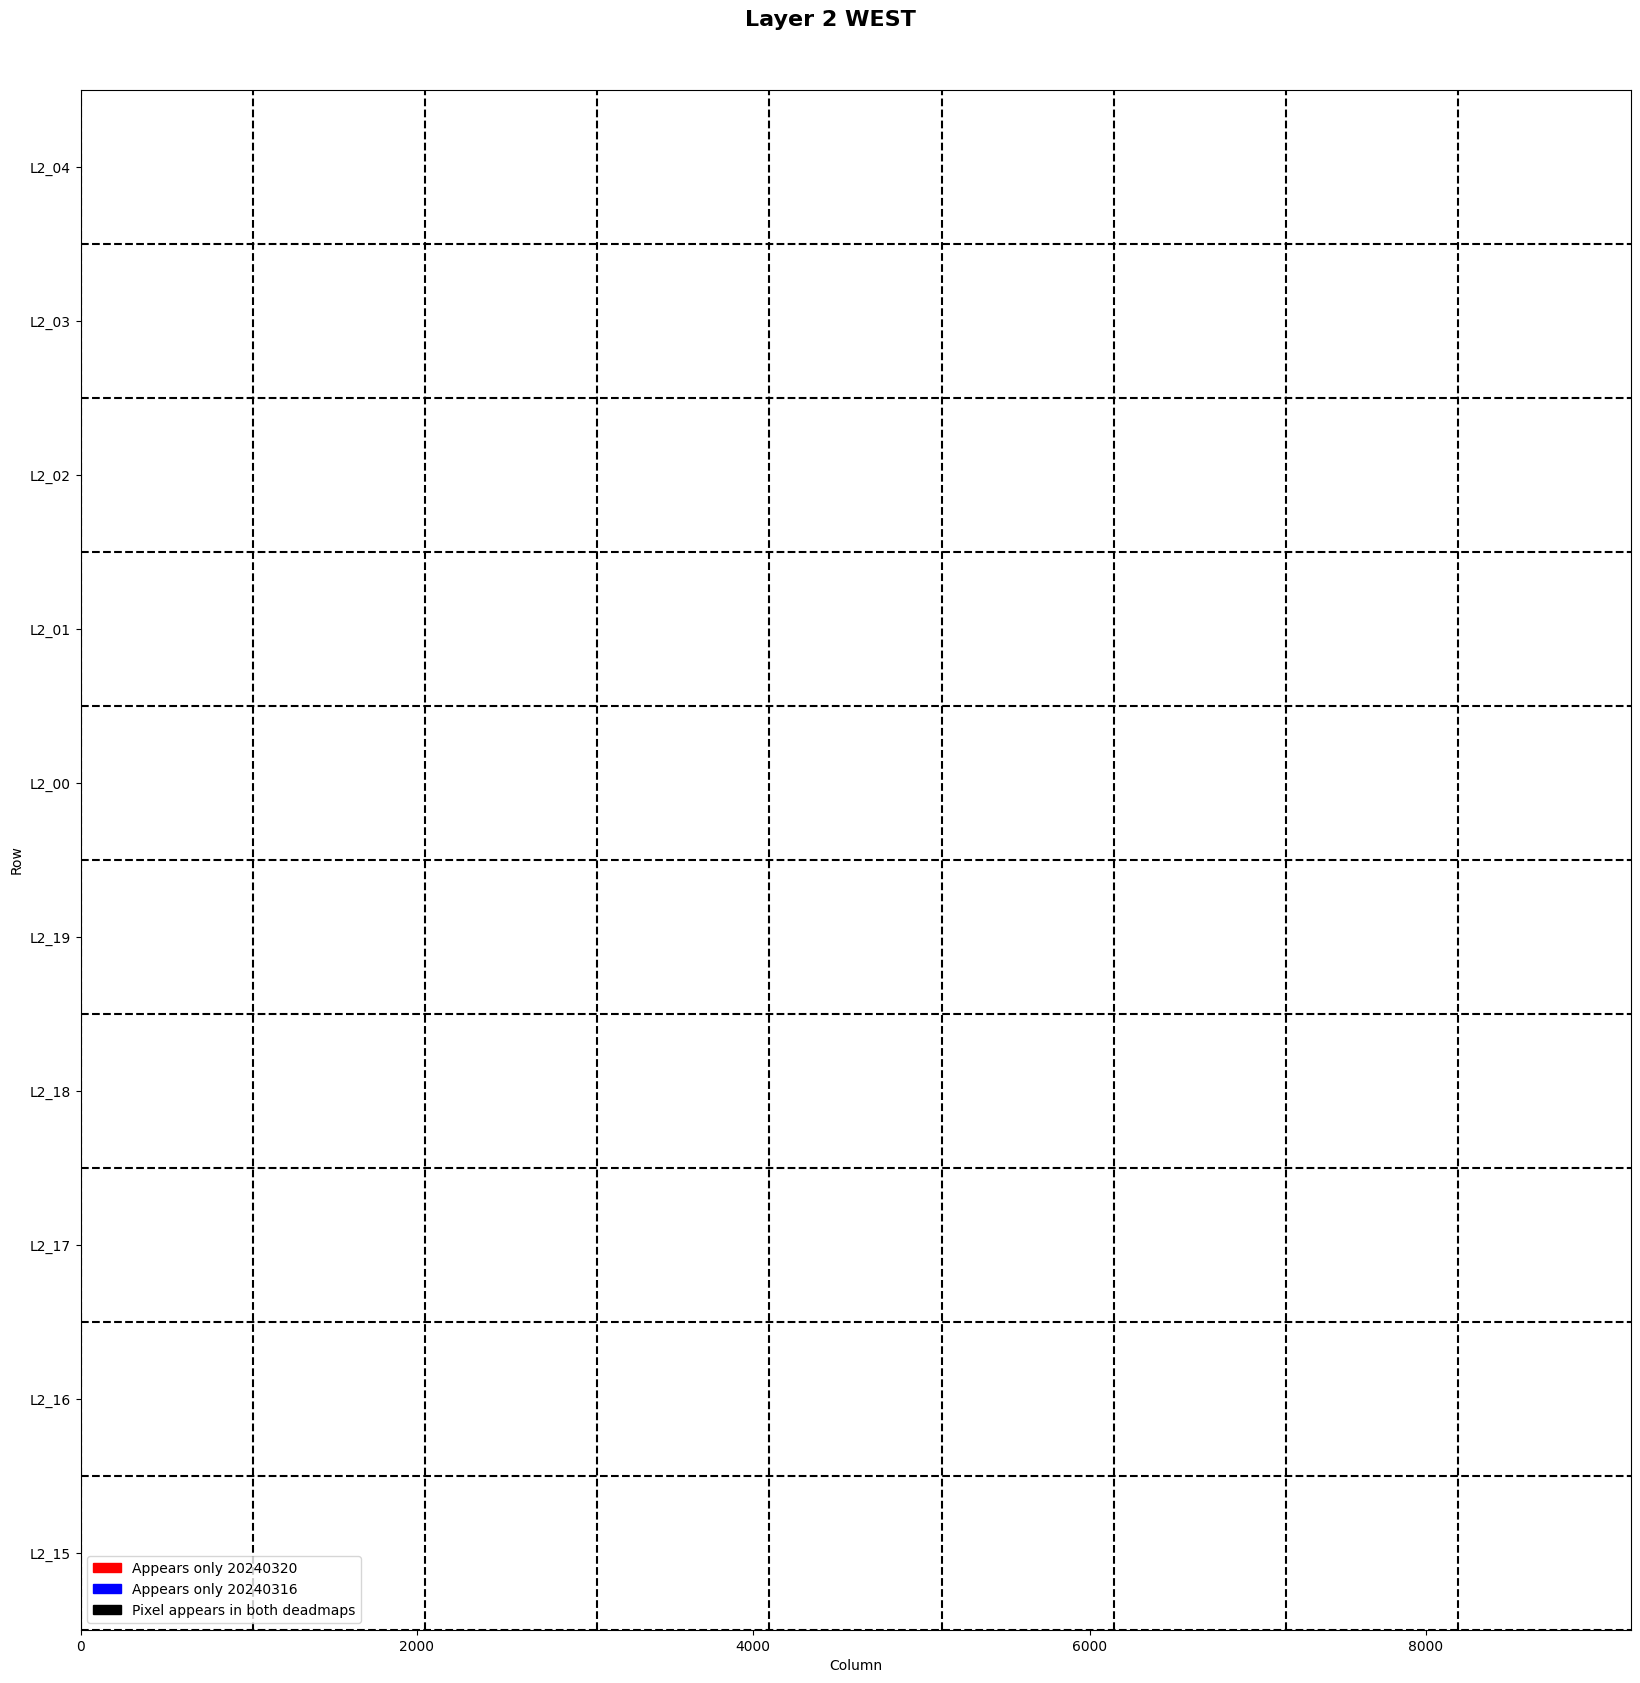

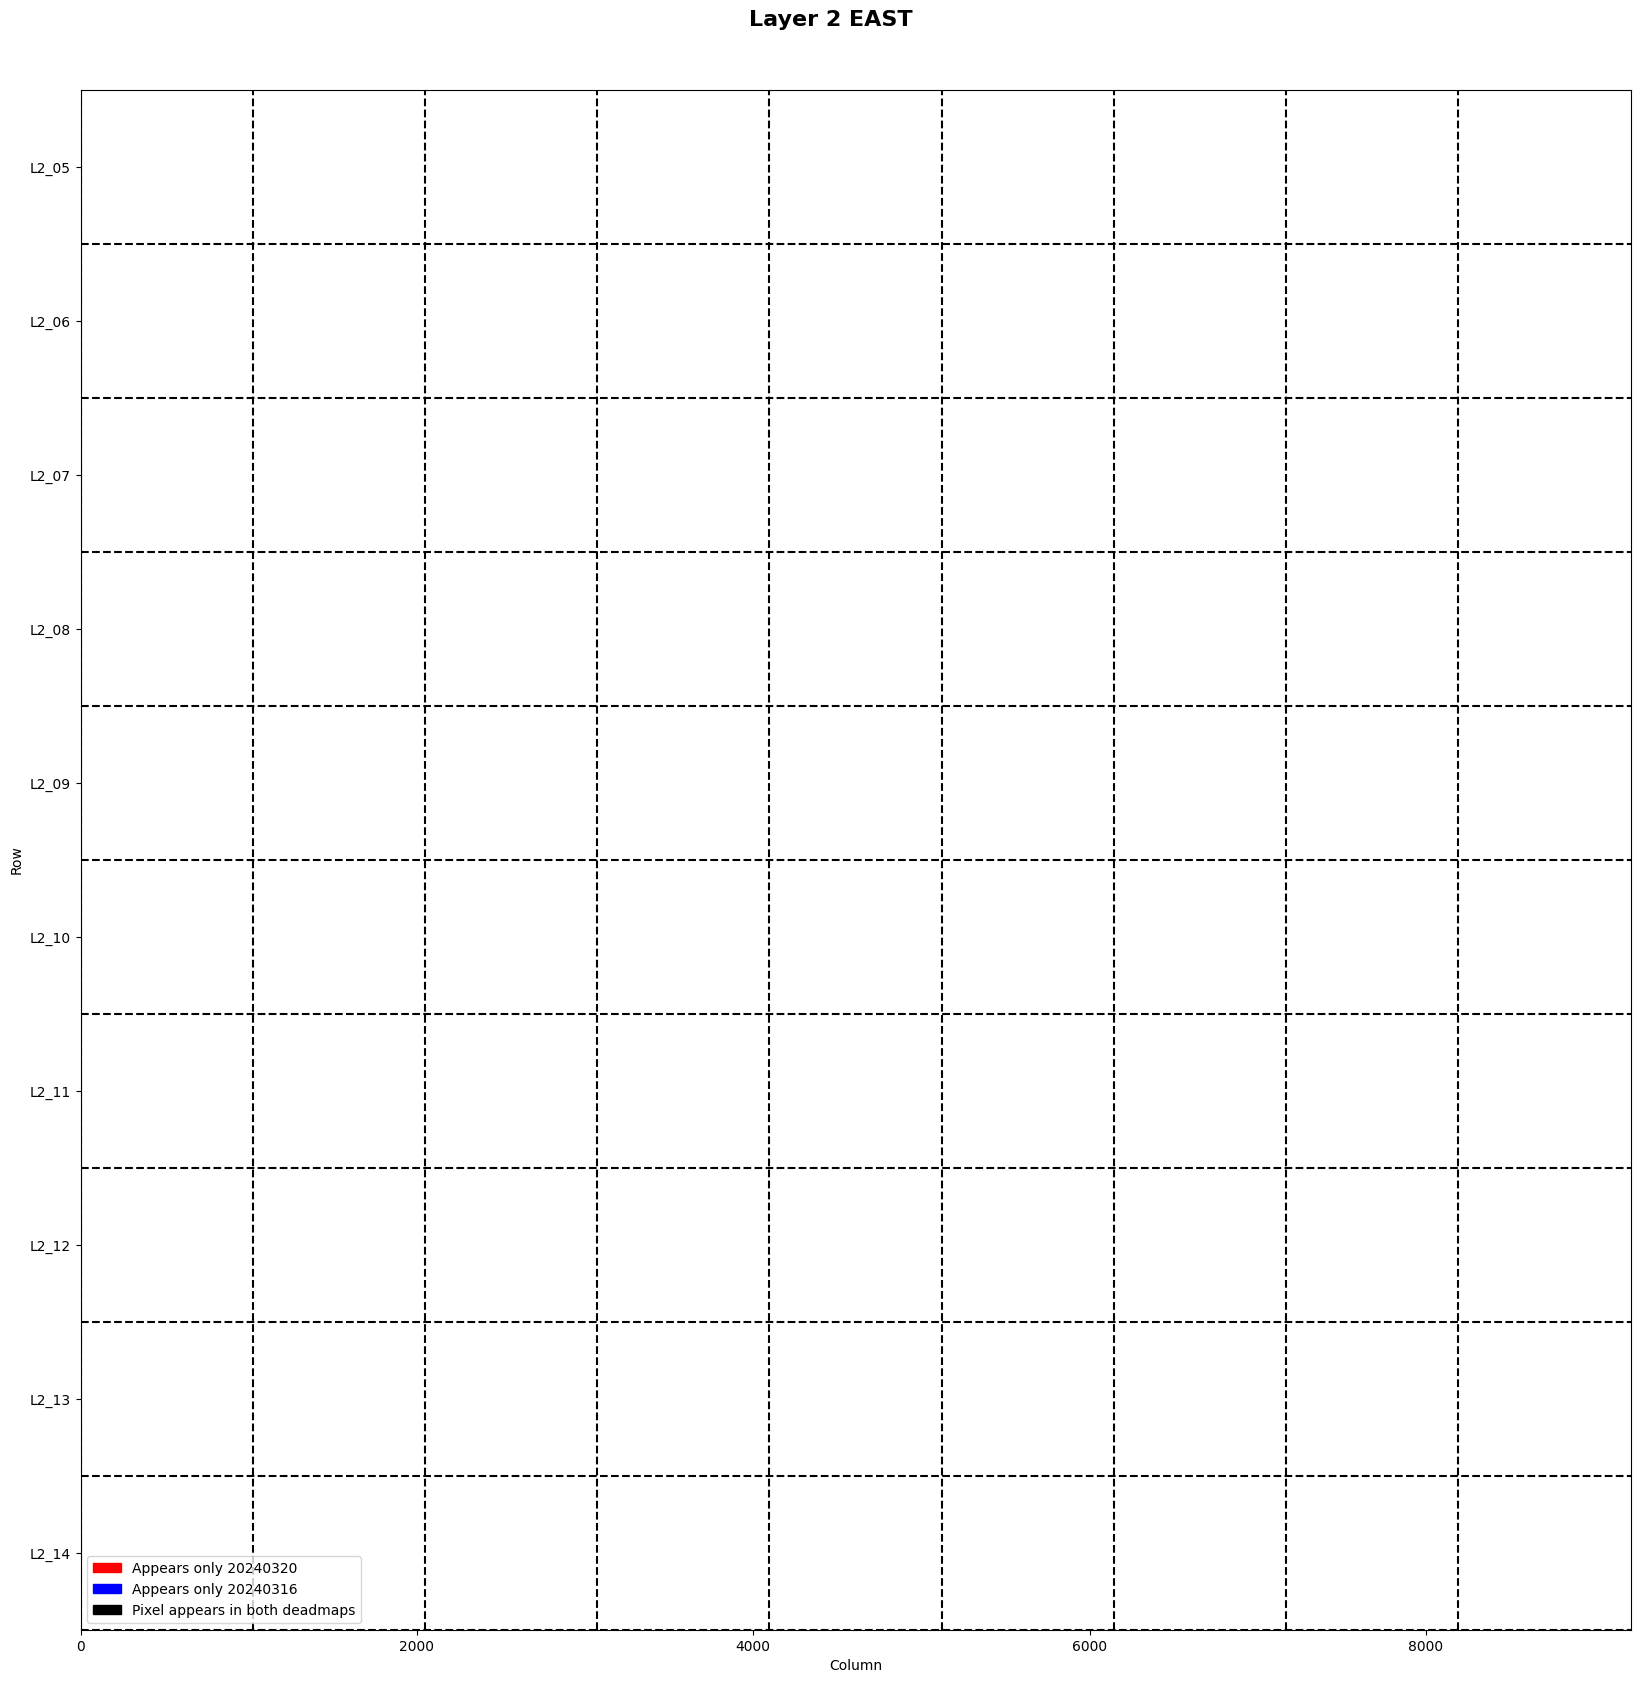

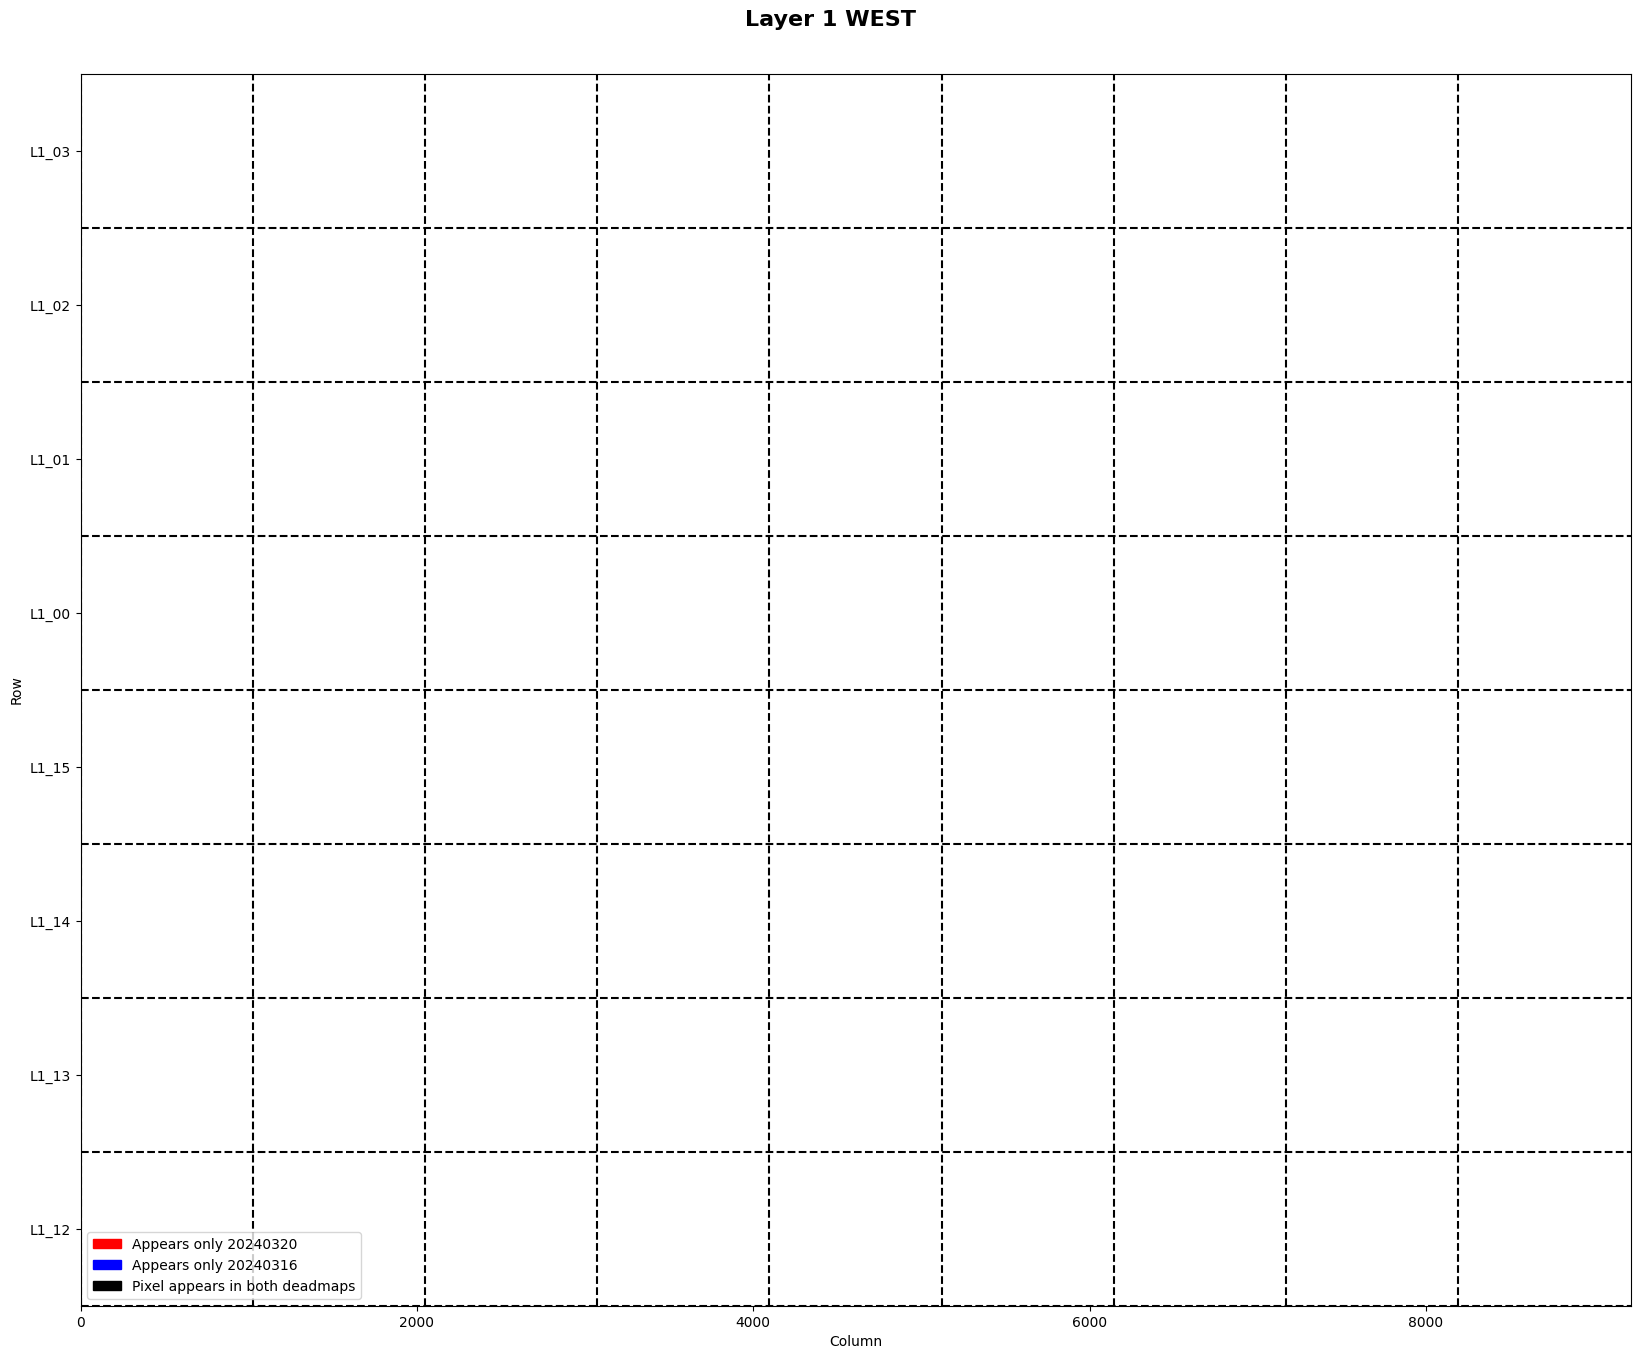

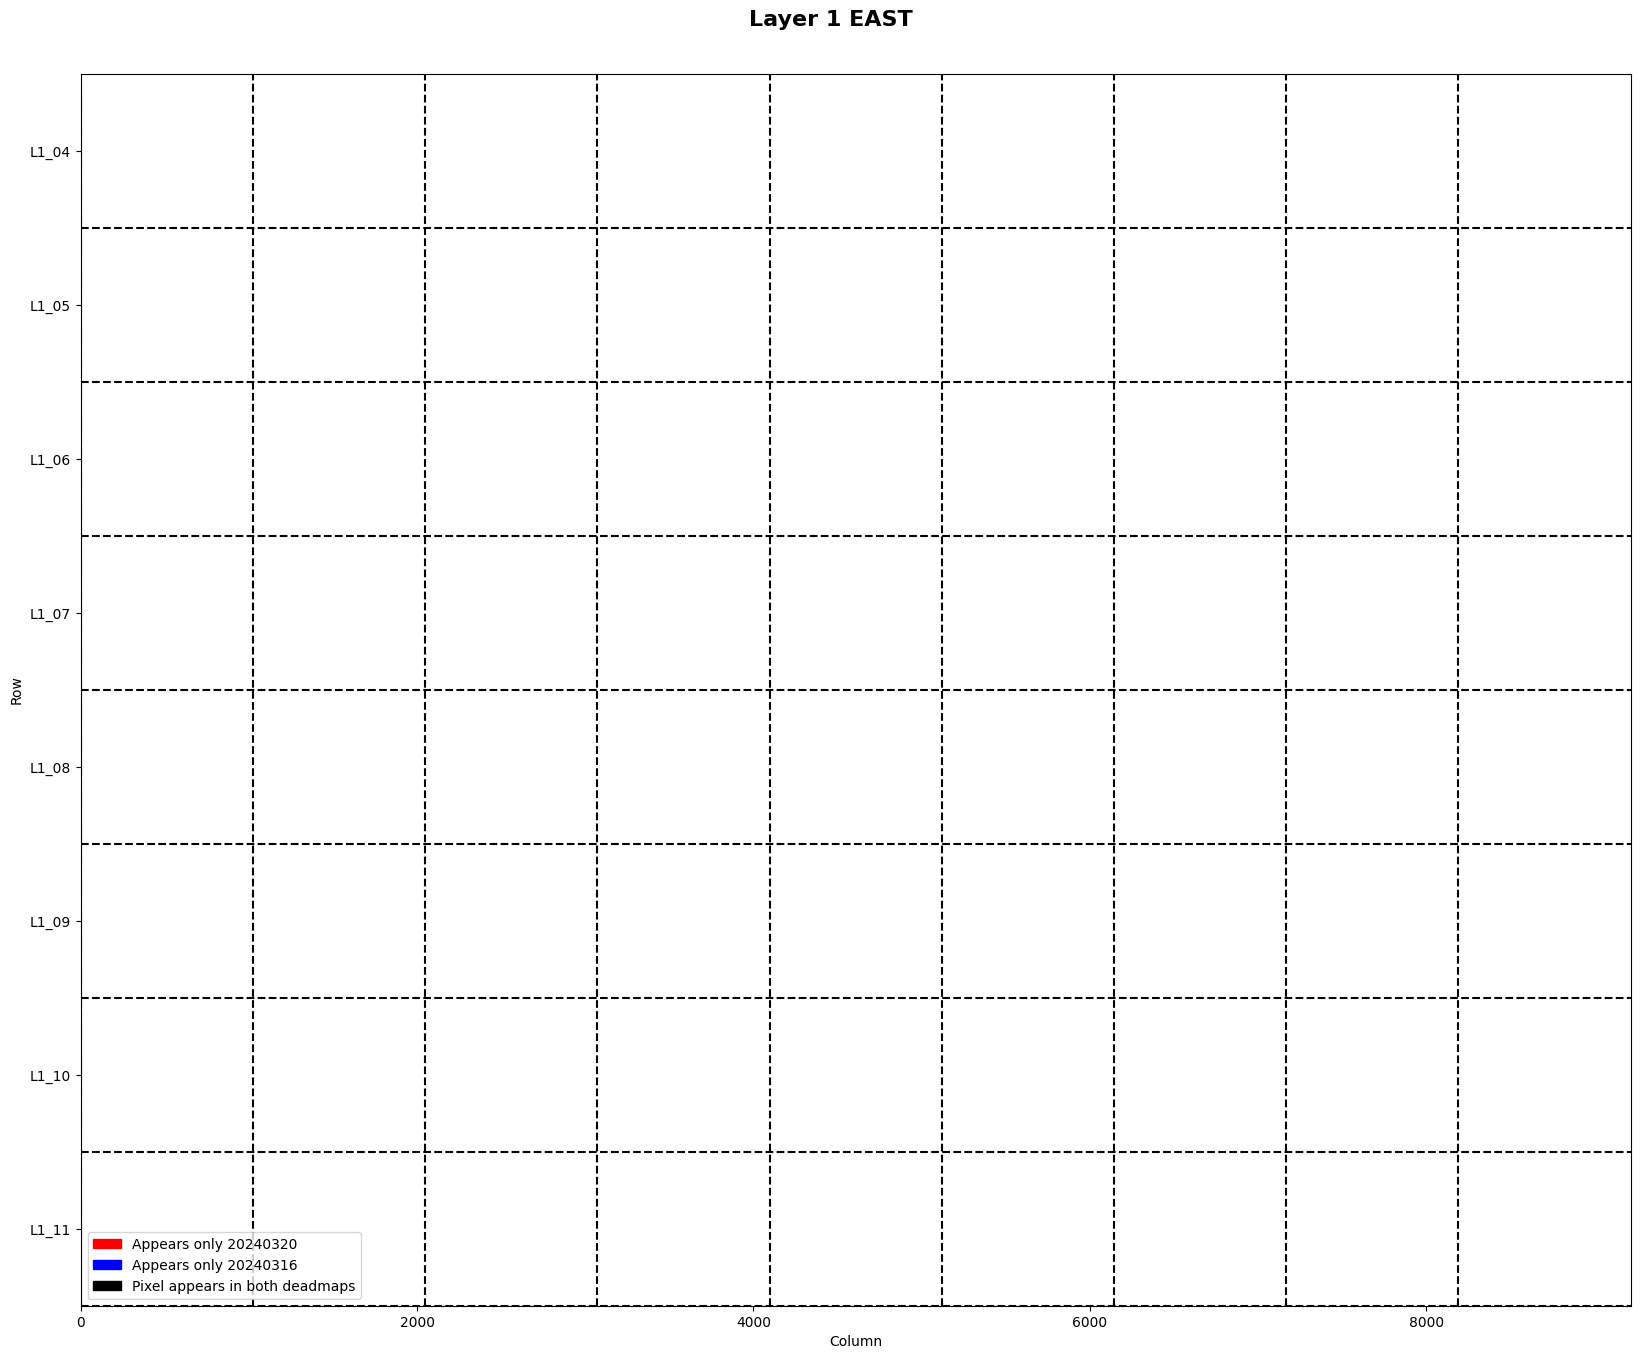

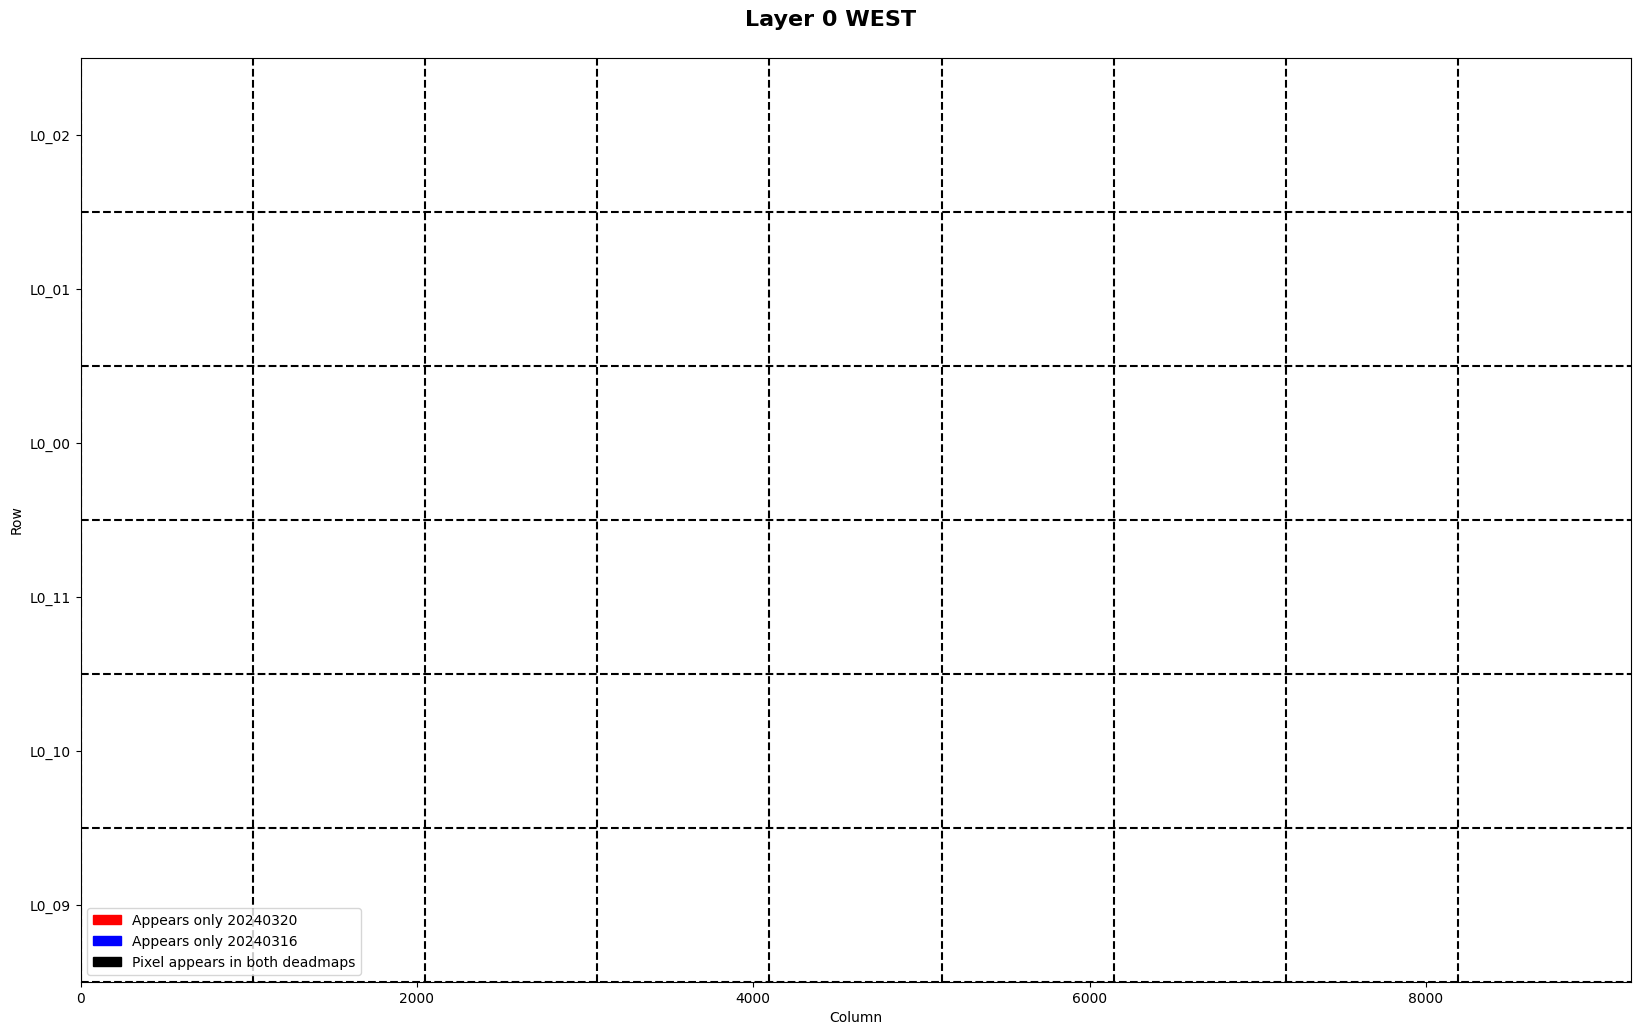

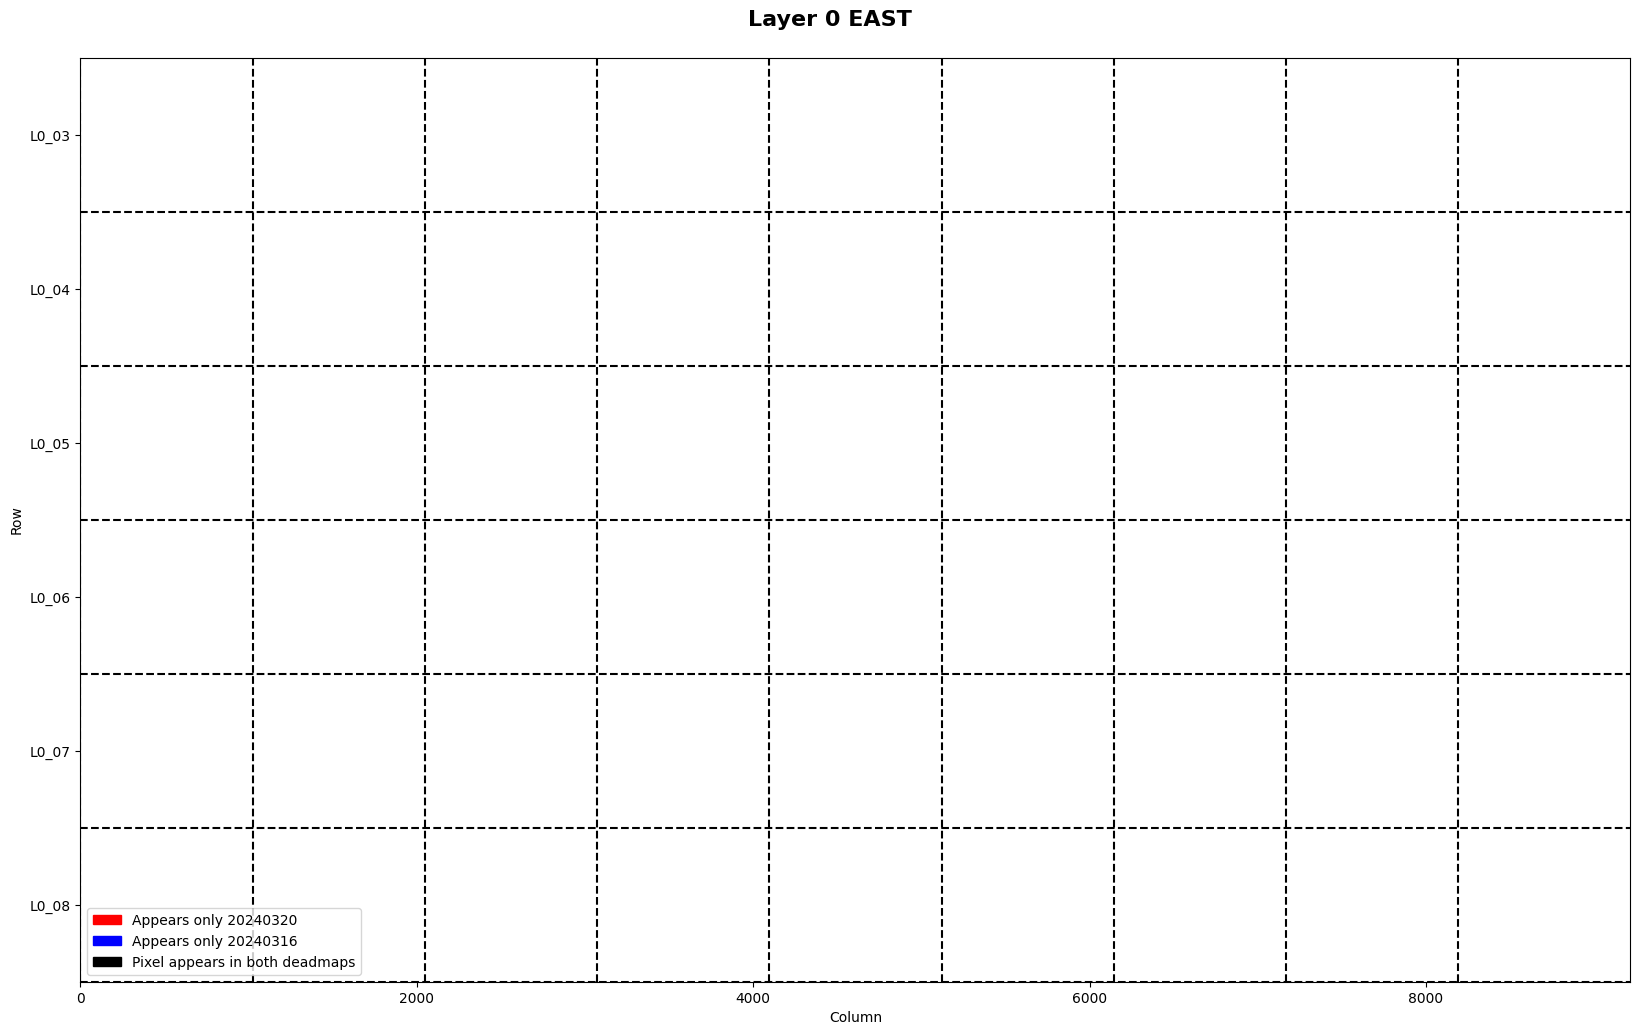

In [113]:
Layers=[LAYER_2_WEST,LAYER_2_EAST,LAYER_1_WEST,LAYER_1_EAST,LAYER_0_WEST,LAYER_0_EAST]
Titles=['Layer 2 WEST','Layer 2 EAST','Layer 1 WEST','Layer 1 EAST','Layer 0 WEST','Layer 0 EAST']
filenames=["plots/20240320/layer2_west_deadpix.png",
           "plots/20240320/layer2_east_deadpix.png",
           "plots/20240320/layer1_west_deadpix.png",
           "plots/20240320/layer1_east_deadpix.png",
           "plots/20240320/layer0_west_deadpix.png",
           "plots/20240320/layer0_east_deadpix.png"]

for i in range(len(Layers)):
    # plot_layer(data_masked, Layers[i], Titles[i], filenames[i])
    plot_layer_compare(deadpix_map_20240320, data_masked, Layers[i], Titles[i], filenames[i])


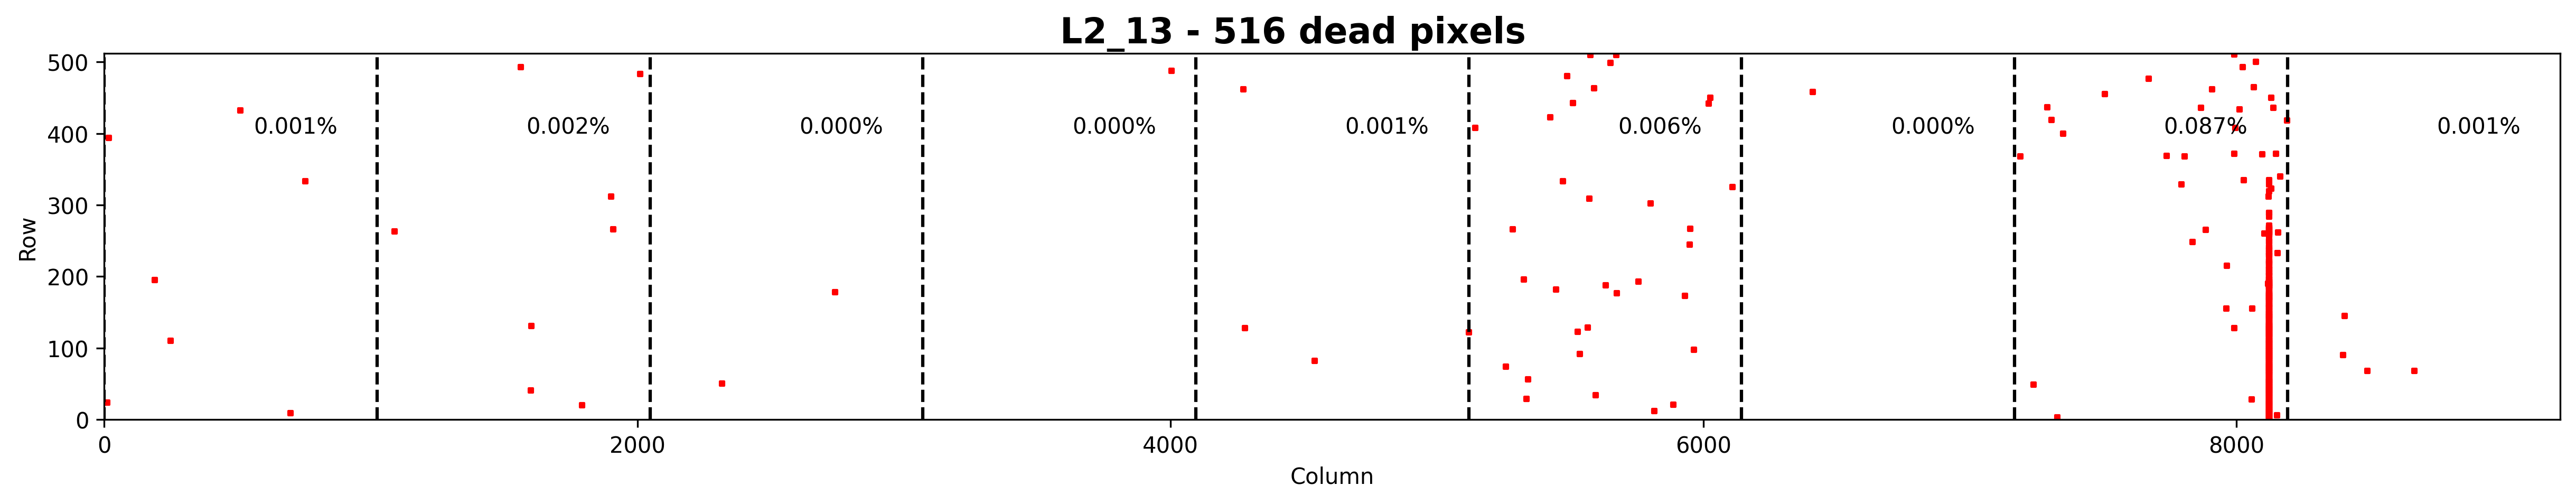

In [104]:
plot_stave(data_deadmap_20240320,'L2_13')

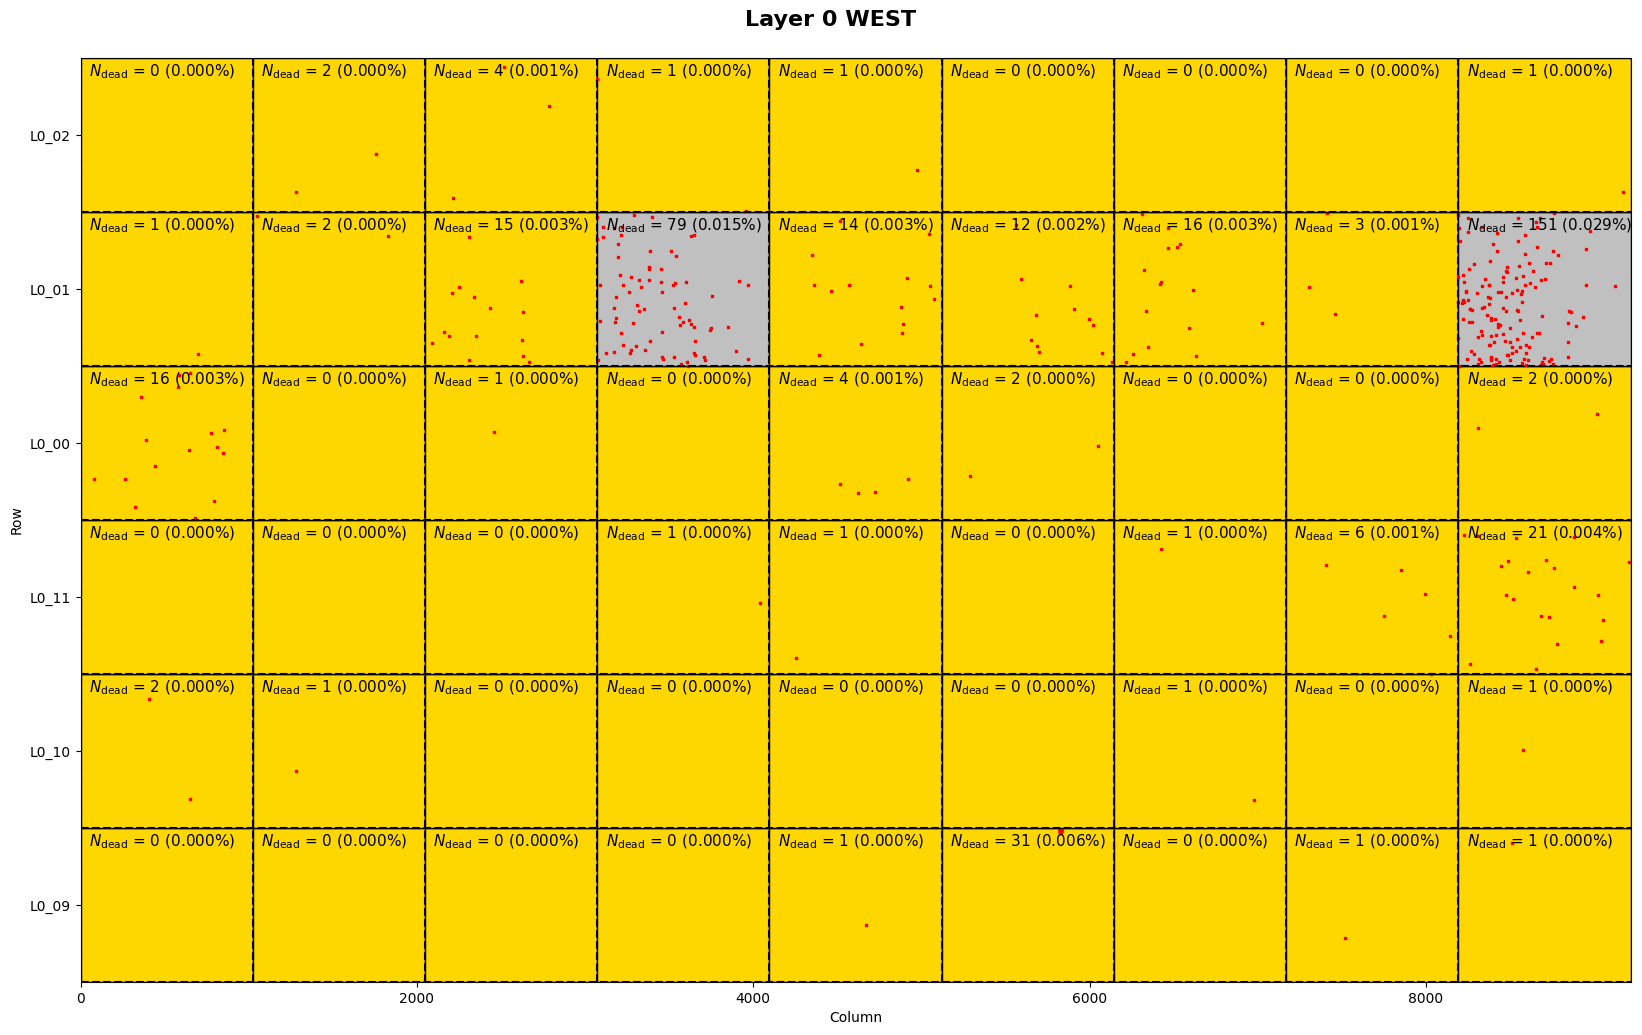

In [95]:
plot_layer(data,LAYER_0_WEST,title='Layer 0 WEST',filename="layer0_west_deadpix.png")

In [13]:
# hard code files names in here ( i only need to run this once)
flx0_file = '/home/tmengel/mvtx-decoder/deadpix/pixmasks/hot_pixel_mask_flx0.json'
flx1_file = '/home/tmengel/mvtx-decoder/deadpix/pixmasks/hot_pixel_mask_flx1.json'
flx2_file = '/home/tmengel/mvtx-decoder/deadpix/pixmasks/hot_pixel_mask_flx2.json'
flx3_file = '/home/tmengel/mvtx-decoder/deadpix/pixmasks/hot_pixel_mask_flx3.json'
flx4_file = '/home/tmengel/mvtx-decoder/deadpix/pixmasks/hot_pixel_mask_flx4.json'
flx5_file = '/home/tmengel/mvtx-decoder/deadpix/pixmasks/hot_pixel_mask_flx5.json'

with open(flx0_file, 'r') as f:
    flx0 = json.load(f)
with open(flx1_file, 'r') as f:
    flx1 = json.load(f)
with open(flx2_file, 'r') as f:
    flx2 = json.load(f)
with open(flx3_file, 'r') as f:
    flx3 = json.load(f)
with open(flx4_file, 'r') as f:
    flx4 = json.load(f)
with open(flx5_file, 'r') as f:
    flx5 = json.load(f)

def reformat(data):
    new_data = {}
    for key in data:
        old_data = data[key]
        pix = []
        for chip_key in old_data.keys():
        
            chip_data = old_data[chip_key]
            for pixel in chip_data:
                
                pix.append([int(chip_key),int(pixel[1]),int(pixel[0])])
        pix = np.array(pix)
        new_data[key] = pix
    return new_data

flx0 = reformat(flx0)
flx1 = reformat(flx1)
flx2 = reformat(flx2)
flx3 = reformat(flx3)
flx4 = reformat(flx4)
flx5 = reformat(flx5)

# merge the data
all_masks = {**flx0, **flx1, **flx2, **flx3, **flx4, **flx5}


outfile='/home/tmengel/mvtx-decoder/deadpix/deadmaps/masked_pixels.json'
with open(outfile, 'w') as f:
    json.dump(all_masks, f, cls=NumpyEncoder, indent=1)

In [7]:
flx5

{'L0_10': {'0': [[40, 52], [831, 85], [57, 146], [273, 257], [511, 450]],
  '1': [[80, 67],
   [712, 79],
   [283, 99],
   [596, 100],
   [690, 158],
   [930, 165],
   [259, 190],
   [988, 217],
   [769, 246],
   [785, 297],
   [25, 326],
   [59, 441],
   [131, 479]],
  '2': [[622, 27],
   [678, 75],
   [362, 79],
   [871, 111],
   [893, 198],
   [974, 269],
   [84, 288],
   [727, 328],
   [754, 372],
   [954, 373],
   [486, 384],
   [152, 492]],
  '3': [[14, 4],
   [552, 26],
   [779, 49],
   [178, 53],
   [837, 122],
   [58, 171],
   [85, 184],
   [908, 195],
   [715, 209],
   [307, 212],
   [860, 243],
   [535, 245],
   [904, 262],
   [962, 269],
   [648, 324],
   [475, 378],
   [581, 382],
   [877, 398],
   [52, 443],
   [589, 457],
   [489, 468],
   [483, 502],
   [783, 506]],
  '4': [[605, 7],
   [294, 27],
   [440, 27],
   [978, 93],
   [285, 100],
   [120, 139],
   [563, 155],
   [591, 161],
   [909, 167],
   [282, 197],
   [728, 209],
   [966, 227],
   [386, 233],
   [975, 236